In [1]:
from scipy.cluster.hierarchy import linkage

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris['data']

data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [8]:
hclusters = linkage(data, 'ward')

In [9]:
hclusters[0:5]

array([[  9.00000000e+00,   3.40000000e+01,   0.00000000e+00,
          2.00000000e+00],
       [  3.70000000e+01,   1.50000000e+02,   0.00000000e+00,
          3.00000000e+00],
       [  1.01000000e+02,   1.42000000e+02,   0.00000000e+00,
          2.00000000e+00],
       [  7.00000000e+00,   3.90000000e+01,   1.00000000e-01,
          2.00000000e+00],
       [  0.00000000e+00,   1.70000000e+01,   1.00000000e-01,
          2.00000000e+00]])

In [10]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(hclusters, pdist(data))

In [11]:
c

0.87260152506447042

In [13]:
print data.shape
print coph_dists.shape

(150, 4)
(11175,)


In [14]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os

%matplotlib inline

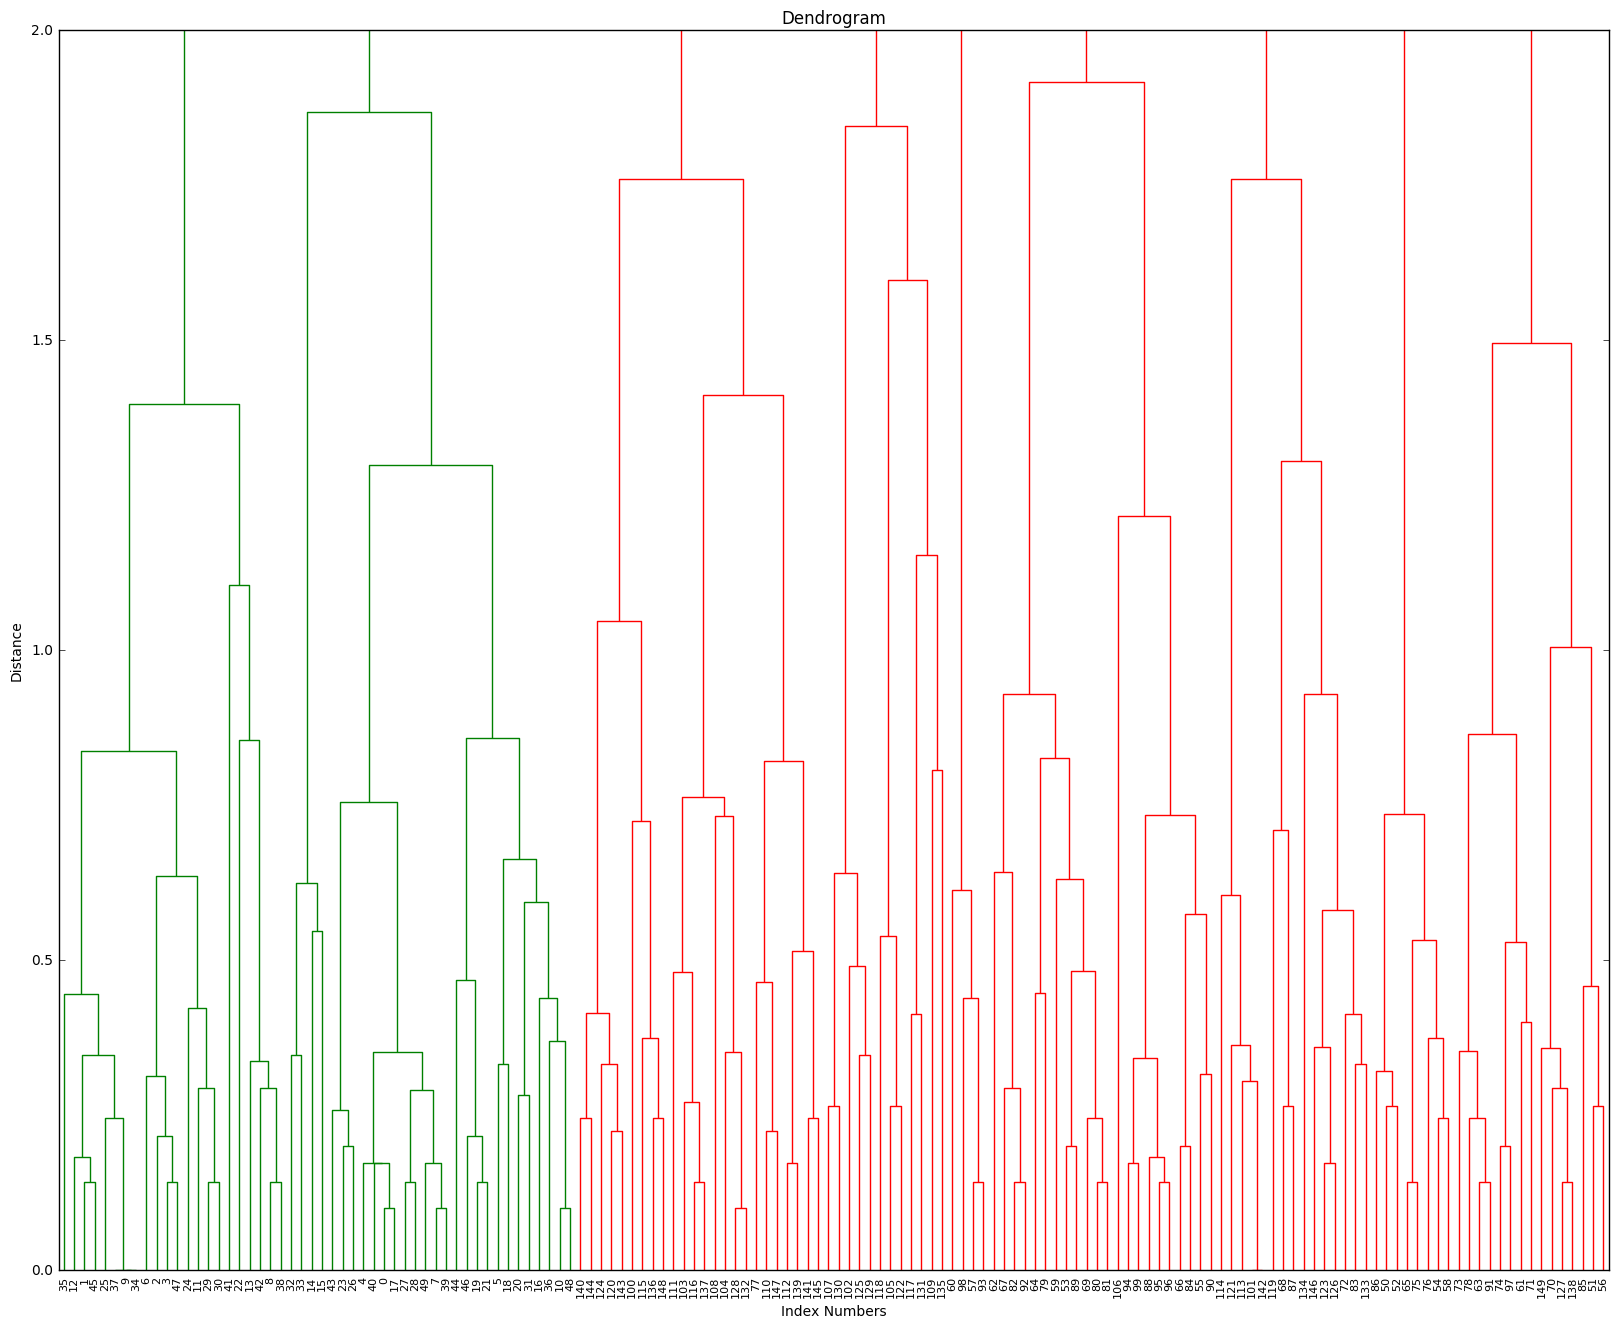

In [17]:
plt.figure(figsize=(20,16))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    hclusters,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.ylim([0,2])
plt.show()

In [18]:
max_dist = 3
clusters = fcluster(hclusters, max_dist, criterion='distance')
clusters

array([2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 2, 2, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 3, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 3, 6, 4, 3, 3, 4, 5, 4, 3, 4, 3, 3, 3, 6, 6,
       3, 3, 4, 4, 6, 3, 6, 4, 6, 3, 4, 6, 6, 3, 4, 4, 4, 3, 6, 6, 4, 3, 3,
       6, 3, 3, 3, 6, 3, 3, 3, 6, 3, 3, 6], dtype=int32)

In [20]:
wines = pd.read_csv('wine.csv')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
quality = wines['quality']
wines.drop('quality', axis=1, inplace=True)

In [22]:
wines.shape

(1599, 11)

In [23]:
from sklearn.preprocessing import StandardScaler

wines_standardized = StandardScaler().fit_transform(wines.values)

In [24]:
wines_standardized[0:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [25]:
wine_clusters = linkage(wines_standardized, 'ward')

In [26]:
wine_clusters[0]

array([ 0.,  4.,  0.,  2.])

In [27]:
c, coph_dists = cophenet(wine_clusters, pdist(wines_standardized))

In [28]:
c

0.38577404147427335

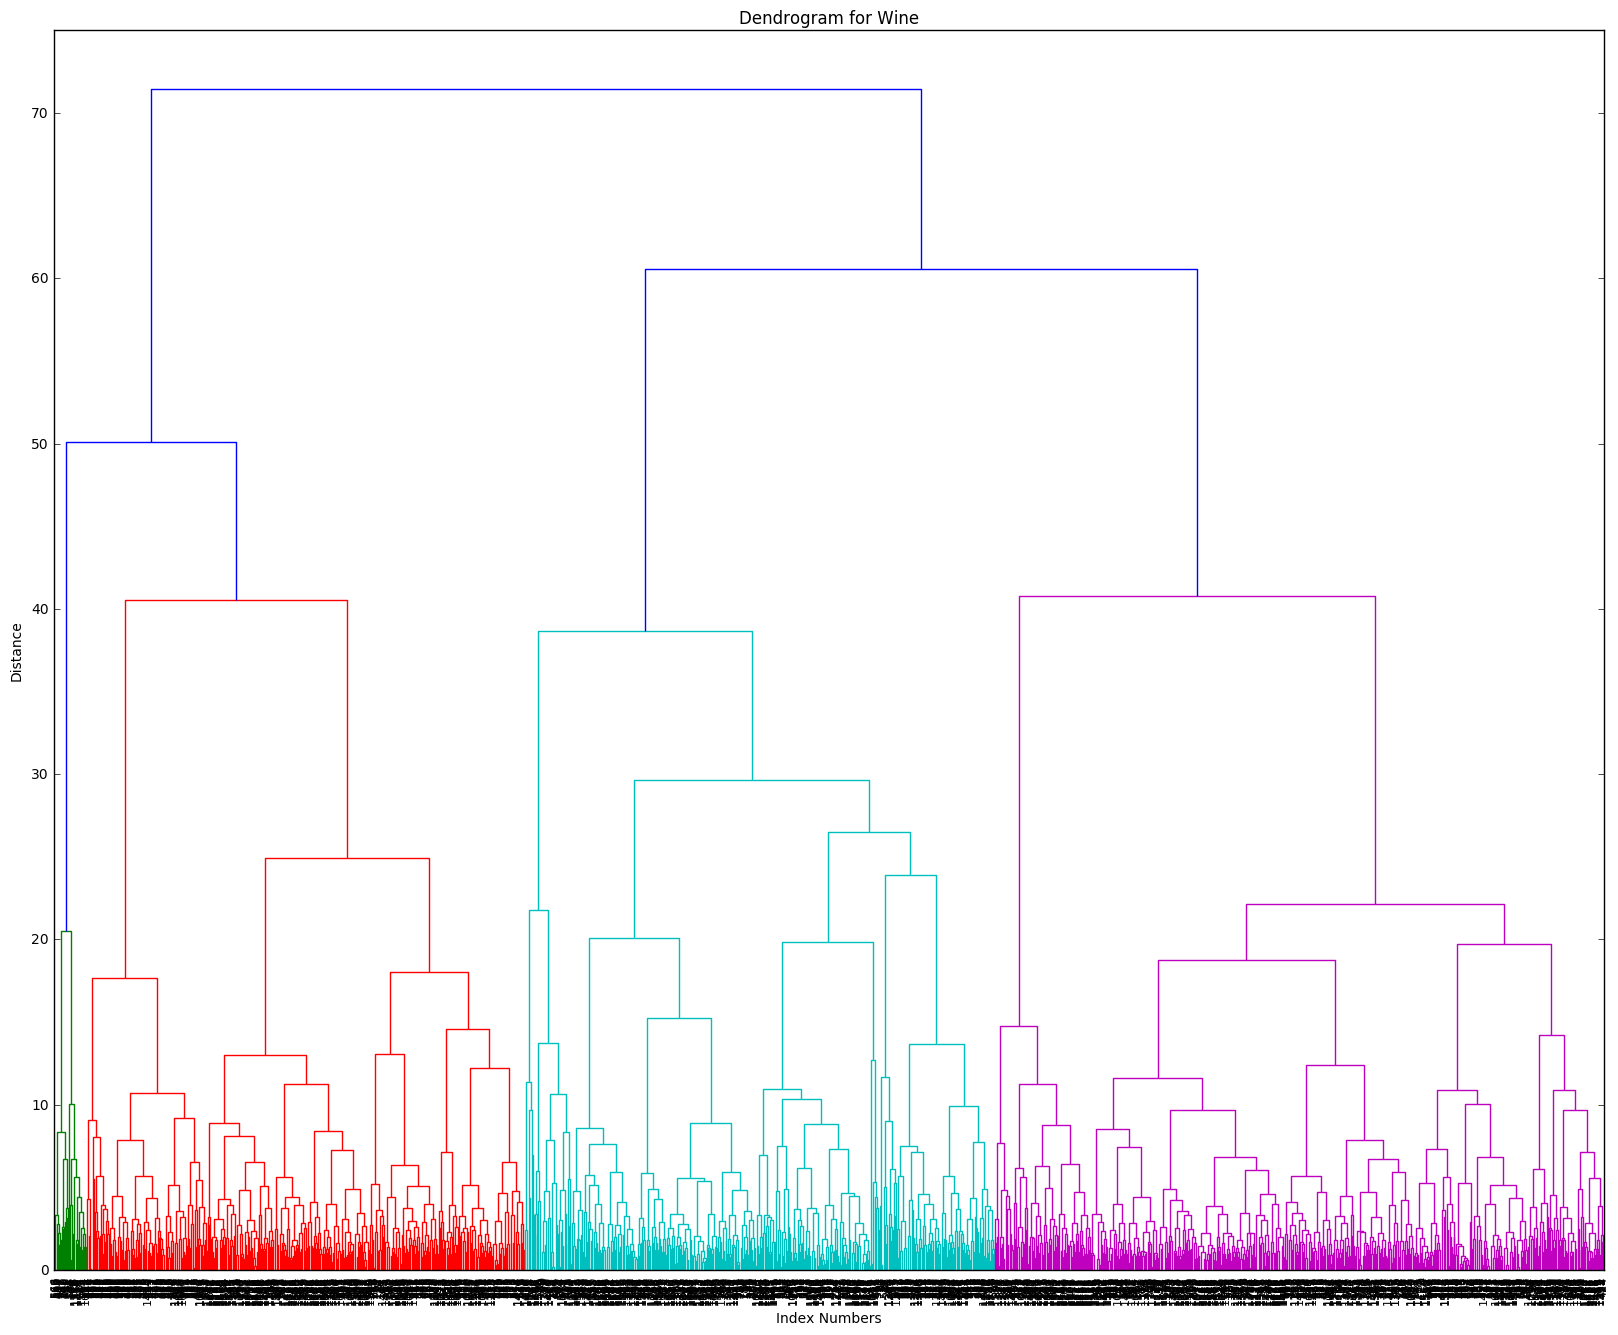

In [30]:
plt.figure(figsize=(20,16))
plt.title('Dendrogram for Wine')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    wine_clusters,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

In [31]:
quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [32]:
max_dist = 39
clusters = fcluster(wine_clusters, max_dist, criterion='distance')
set(clusters)

{1, 2, 3, 4, 5, 6}

In [33]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


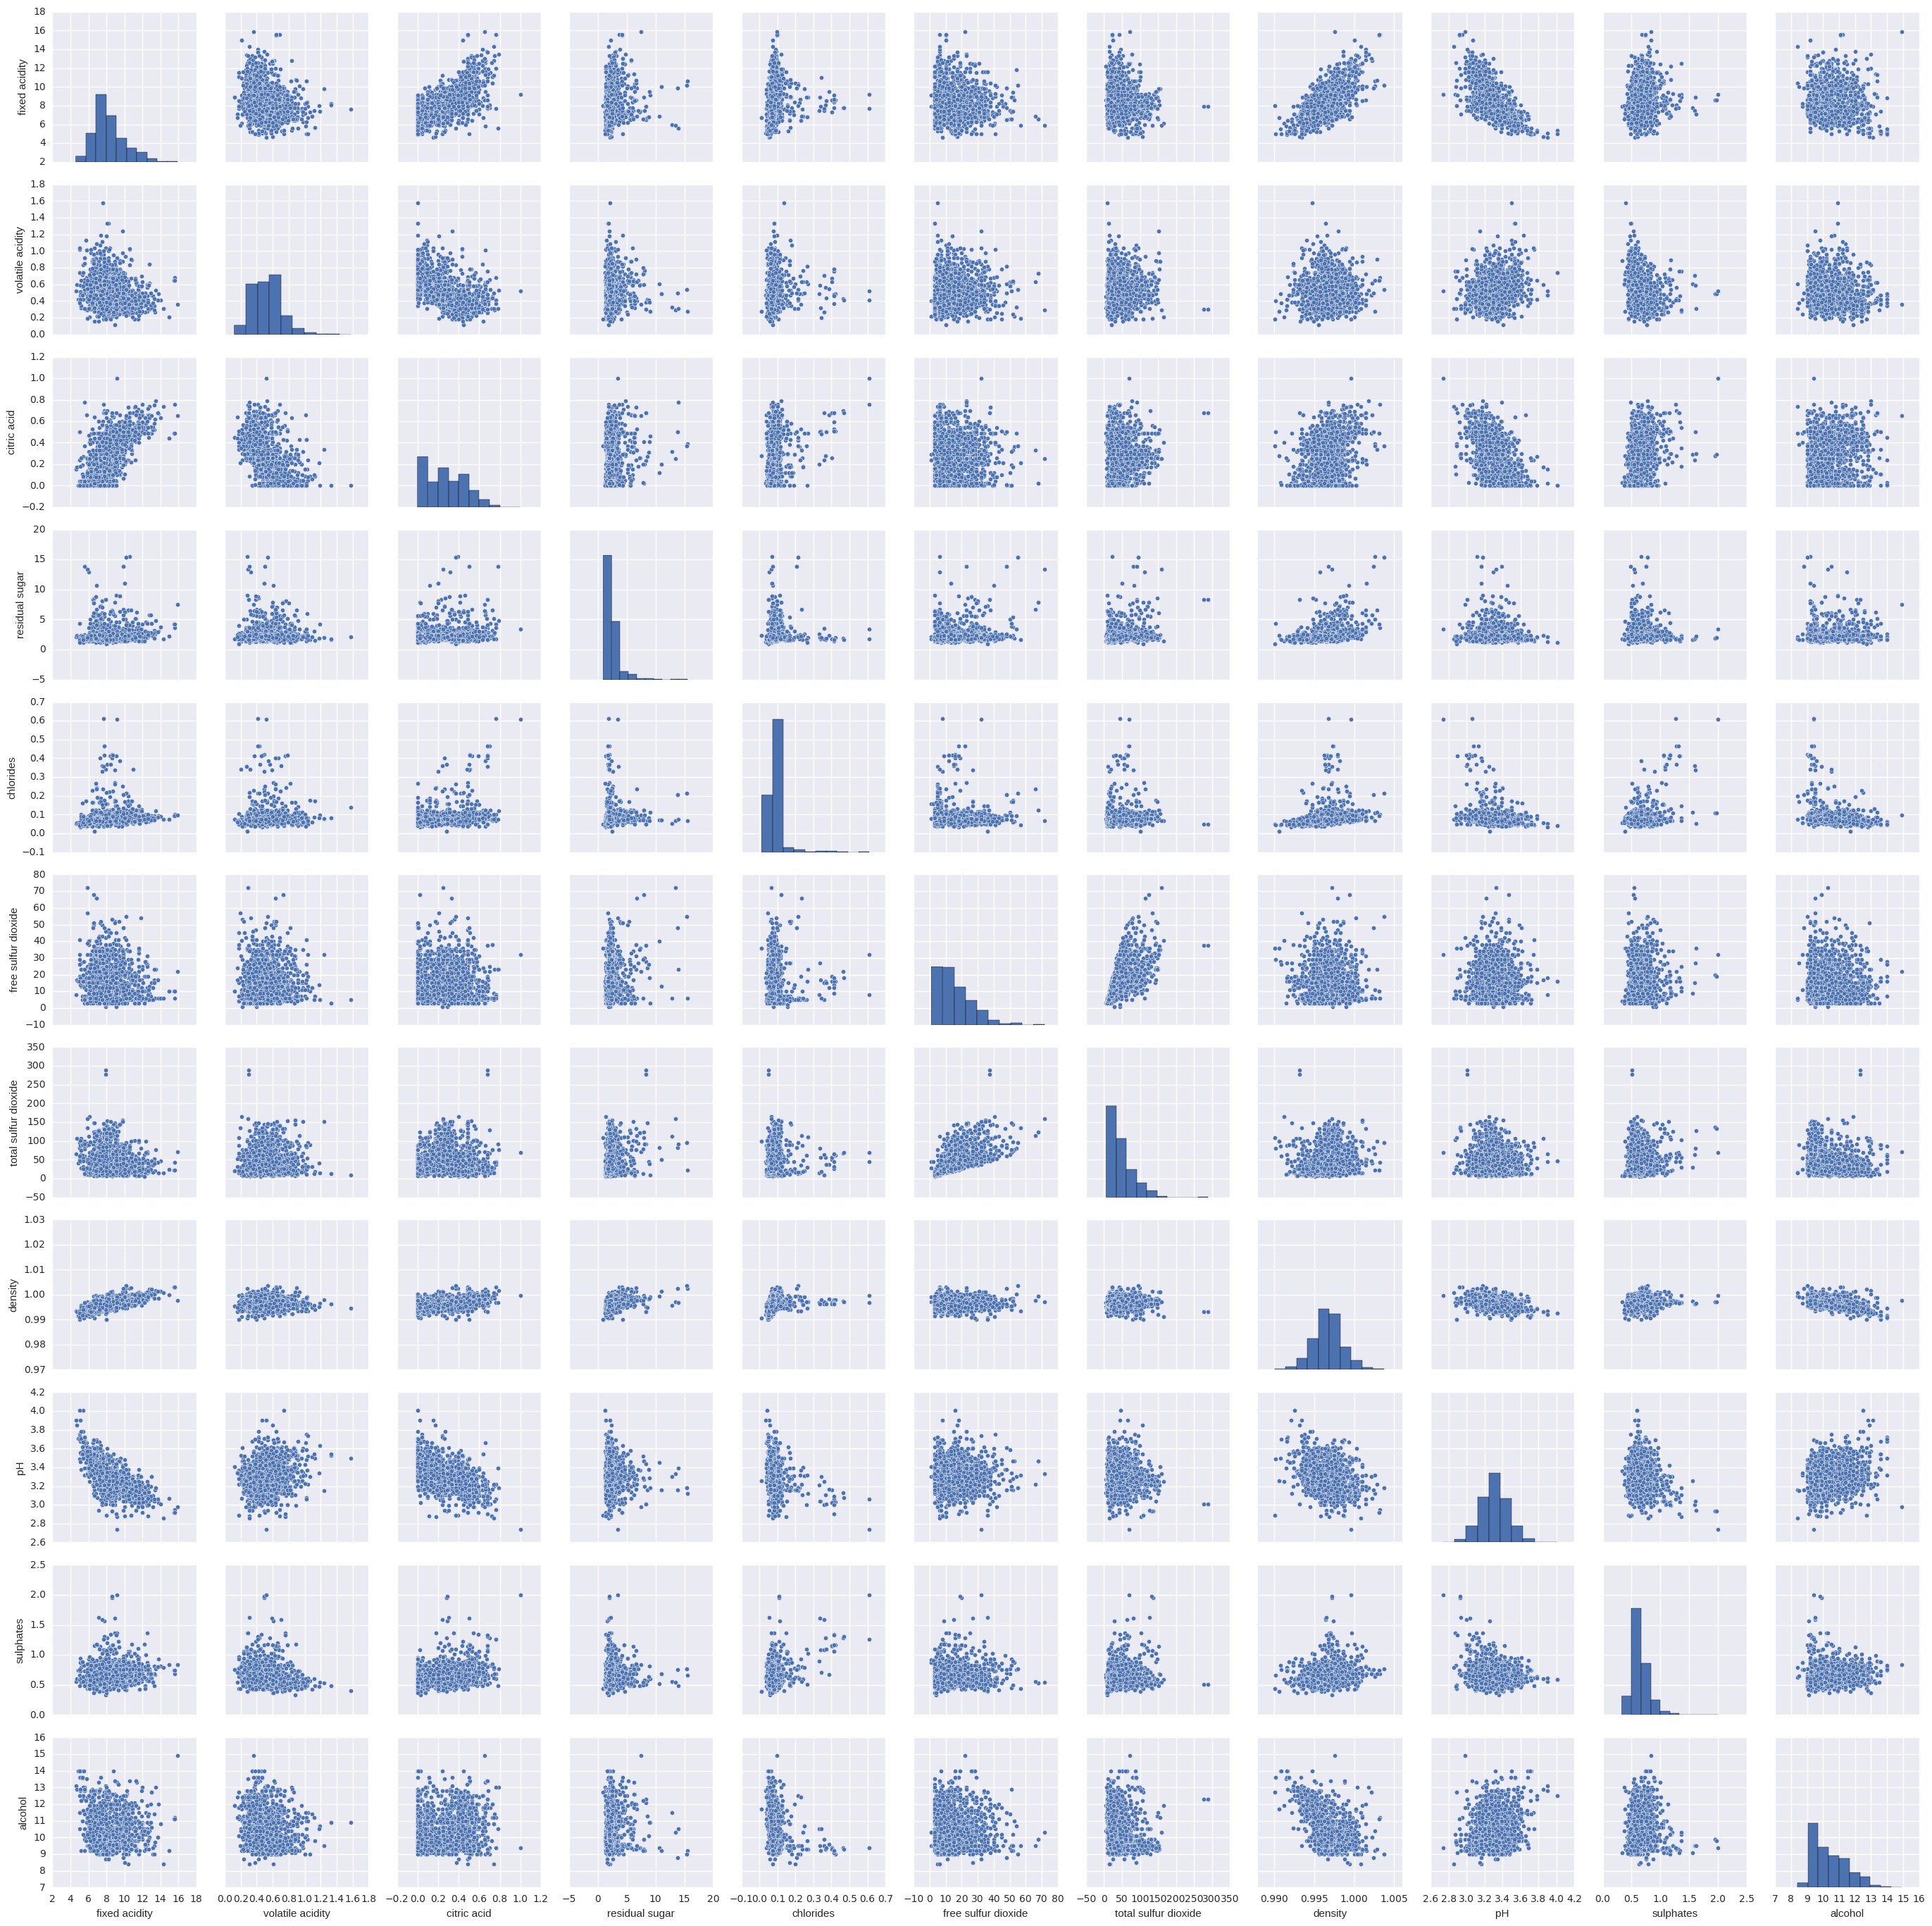

In [34]:
import seaborn as sns
sns.pairplot(wines)

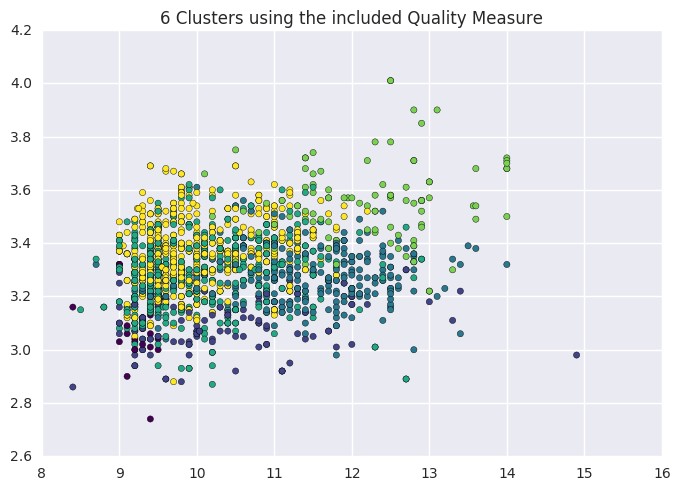

In [36]:
plt.scatter(wines['alcohol'], wines['pH'], c=clusters, cmap='viridis')
plt.title('6 Clusters using the included Quality Measure')
plt.show()

In [37]:
wines.groupby('clusters')['pH'].mean()

KeyError: 'clusters'